In [21]:
import pandas as pd

In [22]:
df_2019 = pd.read_csv('2019_지수.csv')
df_2018 = pd.read_csv('2018_지수.csv')
df_2017 = pd.read_csv('2017_지수.csv')

In [23]:
data = pd.read_csv('risk_3.csv')

In [24]:
gap = []
for i in range(len(data)):
    gap.append((data['2017_gap'][i]+data['2018_gap'][i]+data['2019_gap'][i])/3)
data['3_gap'] = gap
data = data.round(2)
data.head()

,지역,2017_risk,2017_C_risk,2017_gap,2018_risk,2018_C_risk,2018_gap,2019_risk,2019_C_risk,2019_gap,3_gap
0,용산구,4.12,0.0,4.12,3.44,0.0,3.44,3.67,3.0,0.67,2.74
1,금천구,3.48,0.0,3.48,4.15,3.0,1.15,3.20,3.0,0.20,1.61
2,강북구,3.38,0.0,3.38,3.72,0.0,3.72,3.51,3.6,-0.09,2.34
3,성동구,5.36,3.0,2.36,3.32,3.0,0.32,4.13,3.0,1.13,1.27
4,영등포구,3.94,3.0,0.94,3.39,3.0,0.39,3.73,3.0,0.73,0.69


In [15]:
plt_df = pd.read_csv('구별 시설_CCTV 개수.csv')

In [26]:
data = data.sort_values(by=['지역'])
data = data.reset_index(drop=True)

In [27]:
data = data[['지역', '2019_gap']]
data.columns = ['name', '위험도 지수']

In [103]:
data = pd.merge(data, plt_df, on='name')

In [104]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [105]:
from matplotlib import font_manager, rc

rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

<Figure size 28800x14400 with 0 Axes>

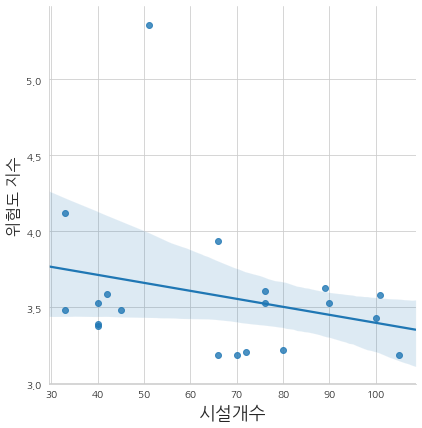

In [107]:
# ---------- 위험도 지수와 CCTV설치대수 · 시설개수 상관관계 시각화 ----------
plt.figure(figsize=(400,200))
sns.pairplot(data,
            x_vars=['시설개수'],
            y_vars=['위험도 지수'], kind='reg', size=6)
plt.xlabel('시설개수', fontsize=18)
plt.ylabel('위험도 지수', fontsize=16)
plt.show()

<Figure size 14400x21600 with 0 Axes>

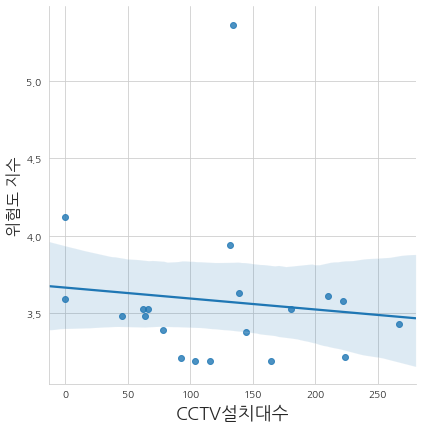

In [108]:
plt.figure(figsize=(200,300))
sns.pairplot(data,
            x_vars=['CCTV설치대수'],
            y_vars=['위험도 지수'], kind='reg', size=6)
plt.xlabel('CCTV설치대수', fontsize=18)
plt.ylabel('위험도 지수', fontsize=16)
plt.show()
